

# Importing the Libarary



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your uploaded dataset

In [ ]:
df = pd.read_csv("/content/owid-co2-data.csv")

In [ ]:
df = df[df["country"] == "Germany"].reset_index(drop=True)
df = df[(df["year"] >= 1970) & (df["year"] <= 2023)].reset_index(drop=True)

In [ ]:
df["co2"] = df["co2"].interpolate(method="linear")

The way to Validate the Data

In [ ]:

def validate_csv_full(file_path):
    try:
        # Load CSV
        df = pd.read_csv(file_path)
        print(f" Successfully loaded: {file_path}")
        print(f" Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

        # Column names
        print(" Columns:")
        print(list(df.columns))
        print("\n" + "-"*60 + "\n")

        # Missing values
        print(" Missing Values Summary:")
        missing = df.isnull().sum()
        missing = missing[missing > 0].sort_values(ascending=False)
        if not missing.empty:
            print(missing)
        else:
            print(" No missing values.")
        print("\n" + "-"*60 + "\n")

        # Duplicates
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            print(f" Found {duplicates} duplicate rows.")
        else:
            print(" No duplicate rows.")
        print("\n" + "-"*60 + "\n")

        # Data types
        print(" Data Types:")
        print(df.dtypes)
        print("\n" + "-"*60 + "\n")

        # Descriptive stats (categorical)
        print(" Categorical Summary:")
        print(df.describe(include=[object]).T)
        print("\n" + "-"*60 + "\n")

    except Exception as e:
        print(f" Error: {e}")


# ✅ Run validation on your uploaded file
file_path = "/content/owid-co2-data.csv"
validate_csv_full(file_path)

 Successfully loaded: /content/owid-co2-data.csv
 Shape: 50191 rows × 79 columns

 Columns:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2

In [ ]:
# ISO country codes should be 3 letters
invalid_iso = df[df["iso_code"].notnull() & (df["iso_code"].str.len() != 3)]
print("Invalid ISO codes:\n", invalid_iso)

Invalid ISO codes:
 Empty DataFrame
Columns: [country, year, iso_code, population, gdp, cement_co2, cement_co2_per_capita, co2, co2_growth_abs, co2_growth_prct, co2_including_luc, co2_including_luc_growth_abs, co2_including_luc_growth_prct, co2_including_luc_per_capita, co2_including_luc_per_gdp, co2_including_luc_per_unit_energy, co2_per_capita, co2_per_gdp, co2_per_unit_energy, coal_co2, coal_co2_per_capita, consumption_co2, consumption_co2_per_capita, consumption_co2_per_gdp, cumulative_cement_co2, cumulative_co2, cumulative_co2_including_luc, cumulative_coal_co2, cumulative_flaring_co2, cumulative_gas_co2, cumulative_luc_co2, cumulative_oil_co2, cumulative_other_co2, energy_per_capita, energy_per_gdp, flaring_co2, flaring_co2_per_capita, gas_co2, gas_co2_per_capita, ghg_excluding_lucf_per_capita, ghg_per_capita, land_use_change_co2, land_use_change_co2_per_capita, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita

In [ ]:
# Example: Ensure country-year combinations are unique
dupes = df[df.duplicated(subset=['country', 'year'], keep=False)]
print(dupes)
dupe_indices = dupes.index.tolist()

# Change the second duplicate to year = 2023
if len(dupe_indices) > 1:
    df.loc[dupe_indices[1], "year"] = 2023
if len(dupe_indices) > 1:
    df.loc[dupe_indices[1], "year"] = 2023
    duplicates = df.duplicated(subset=['country', 'year']).sum()
print(f"⚠️ Duplicate country-year rows (after fix): {duplicates}")

Empty DataFrame
Columns: [country, year, iso_code, population, gdp, cement_co2, cement_co2_per_capita, co2, co2_growth_abs, co2_growth_prct, co2_including_luc, co2_including_luc_growth_abs, co2_including_luc_growth_prct, co2_including_luc_per_capita, co2_including_luc_per_gdp, co2_including_luc_per_unit_energy, co2_per_capita, co2_per_gdp, co2_per_unit_energy, coal_co2, coal_co2_per_capita, consumption_co2, consumption_co2_per_capita, consumption_co2_per_gdp, cumulative_cement_co2, cumulative_co2, cumulative_co2_including_luc, cumulative_coal_co2, cumulative_flaring_co2, cumulative_gas_co2, cumulative_luc_co2, cumulative_oil_co2, cumulative_other_co2, energy_per_capita, energy_per_gdp, flaring_co2, flaring_co2_per_capita, gas_co2, gas_co2_per_capita, ghg_excluding_lucf_per_capita, ghg_per_capita, land_use_change_co2, land_use_change_co2_per_capita, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita, other_industry_co2

In [ ]:
df['gdp_per_capita_calc'] = df['gdp'] / df['population']
mismatch = ((df['gdp_per_capita_calc'] - df['gdp_per_capita']).abs() > 1e-3).sum() \
    if 'gdp_per_capita' in df.columns else 0
print(f"⚠️ Inconsistencies in GDP per capita: {mismatch}")

⚠️ Inconsistencies in GDP per capita: 0


In [ ]:
def validate_dataset(df):
    report = {}

    # Data type check
    report['data_types'] = df.dtypes.to_dict()

    # Range check
    report['invalid_years'] = len(df[~df['year'].between(1750, 2025)])
    report['invalid_population'] = len(df[df['population'] < 0])

    # Uniqueness
    report['duplicate_country_year'] = df.duplicated(subset=['country', 'year']).sum()

    # Consistency
    if 'gdp_per_capita' in df.columns:
        df['gdp_per_capita_calc'] = df['gdp'] / df['population']
        report['gdp_per_capita_mismatch'] = ((df['gdp_per_capita_calc'] - df['gdp_per_capita']).abs() > 1e-3).sum()

    return report

# Run validation
report = validate_dataset(df)
print(report)

{'data_types': {'country': dtype('O'), 'year': dtype('int64'), 'iso_code': dtype('O'), 'population': dtype('float64'), 'gdp': dtype('float64'), 'cement_co2': dtype('float64'), 'cement_co2_per_capita': dtype('float64'), 'co2': dtype('float64'), 'co2_growth_abs': dtype('float64'), 'co2_growth_prct': dtype('float64'), 'co2_including_luc': dtype('float64'), 'co2_including_luc_growth_abs': dtype('float64'), 'co2_including_luc_growth_prct': dtype('float64'), 'co2_including_luc_per_capita': dtype('float64'), 'co2_including_luc_per_gdp': dtype('float64'), 'co2_including_luc_per_unit_energy': dtype('float64'), 'co2_per_capita': dtype('float64'), 'co2_per_gdp': dtype('float64'), 'co2_per_unit_energy': dtype('float64'), 'coal_co2': dtype('float64'), 'coal_co2_per_capita': dtype('float64'), 'consumption_co2': dtype('float64'), 'consumption_co2_per_capita': dtype('float64'), 'consumption_co2_per_gdp': dtype('float64'), 'cumulative_cement_co2': dtype('float64'), 'cumulative_co2': dtype('float64'), '

In [ ]:
from scipy import stats

# Option 1: Remove statistical outliers (Z-score method)
numeric_cols = df.select_dtypes(include=[float, int]).columns
df_no_outliers = df[(np.abs(stats.zscore(df[numeric_cols].fillna(0))) < 3).all(axis=1)]

print(f"Original rows: {len(df)}")
print(f"After removing outliers: {len(df_no_outliers)}")

# Option 2: Winsorize (cap extreme values to percentile thresholds)
for col in numeric_cols:
    lower, upper = df[col].quantile([0.01, 0.99])  # keep middle 98%
    df[col] = df[col].clip(lower, upper)
df.head()

Original rows: 54
After removing outliers: 51


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita_calc
0,Germany,1970.53,DEU,78205102.0,1.364478e+12,22.88900,0.29300,1026.022,-25.978,-2.469,...,4.28676,0.006,0.021,0.028,0.001,1245.200,1190.169,NaN,NaN,17430.900413
1,Germany,1971.00,DEU,78345873.0,1.383510e+12,24.24000,0.30900,1037.237,11.214,1.093,...,4.28300,0.006,0.021,0.028,0.001,1255.505,1199.689,NaN,NaN,17659.002919
2,Germany,1972.00,DEU,78719923.0,1.440600e+12,24.75581,0.31464,1041.481,4.244,0.409,...,4.26800,0.006,0.022,0.029,0.001,1255.847,1200.394,NaN,NaN,18300.322779
3,Germany,1973.00,DEU,78966976.0,1.505900e+12,24.32200,0.30800,1085.738,44.257,4.249,...,4.25400,0.006,0.022,0.030,0.001,1302.722,1245.515,NaN,NaN,19069.997058
4,Germany,1974.00,DEU,78996693.0,1.518360e+12,21.95700,0.27800,1062.727,-23.011,-2.119,...,4.23800,0.007,0.023,0.030,0.001,1281.729,1220.526,NaN,NaN,19220.551422


For choosing the country Germany



In [ ]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita_calc
0,Germany,1970.53,DEU,78205102.0,1.364478e+12,22.88900,0.29300,1026.022,-25.978,-2.469,...,4.28676,0.006,0.021,0.028,0.001,1245.200,1190.169,NaN,NaN,17430.900413
1,Germany,1971.00,DEU,78345873.0,1.383510e+12,24.24000,0.30900,1037.237,11.214,1.093,...,4.28300,0.006,0.021,0.028,0.001,1255.505,1199.689,NaN,NaN,17659.002919
2,Germany,1972.00,DEU,78719923.0,1.440600e+12,24.75581,0.31464,1041.481,4.244,0.409,...,4.26800,0.006,0.022,0.029,0.001,1255.847,1200.394,NaN,NaN,18300.322779
3,Germany,1973.00,DEU,78966976.0,1.505900e+12,24.32200,0.30800,1085.738,44.257,4.249,...,4.25400,0.006,0.022,0.030,0.001,1302.722,1245.515,NaN,NaN,19069.997058
4,Germany,1974.00,DEU,78996693.0,1.518360e+12,21.95700,0.27800,1062.727,-23.011,-2.119,...,4.23800,0.007,0.023,0.030,0.001,1281.729,1220.526,NaN,NaN,19220.551422


In [ ]:
df.tail()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita_calc
49,Germany,2019.00,DEU,83559185.00,3.886390e+12,13.28700,0.15900,709.82700,-50.22000,-6.60700,...,2.9980,0.004,0.041,0.047,0.002,793.77500,753.91100,131.596,18.539,46502.629276
50,Germany,2020.00,DEU,83628711.00,3.742720e+12,13.35700,0.16000,648.35700,-61.47000,-8.66000,...,2.9690,0.004,0.041,0.047,0.002,729.72800,691.06500,122.566,18.904,44754.007987
51,Germany,2021.00,DEU,83697082.00,3.841040e+12,13.64000,0.16300,678.77700,30.42000,4.69200,...,2.9400,0.004,0.041,0.048,0.002,759.03600,722.42500,149.604,22.040,45892.161450
52,Germany,2022.00,DEU,84086228.00,3.897536e+12,12.53800,0.14900,671.47200,-7.30600,-1.07600,...,2.9110,0.004,0.042,0.048,0.002,747.96800,713.67500,161.230,24.012,46495.247712
53,Germany,2022.47,DEU,84303370.82,NaN,11.57231,0.13772,623.82018,-70.72861,-9.86179,...,2.8969,0.004,0.042,0.048,0.002,701.95006,665.82694,NaN,NaN,NaN


# Removal of unused data Keeping only year and CO2

In [ ]:
germany = df[["year", "co2"]].dropna().sort_values("year")

In [ ]:
# Scale CO₂ for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
scaled_co2 = scaler.fit_transform(germany["co2"].values.reshape(-1,1))

In [ ]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)
time_steps = 10
X, y = create_sequences(scaled_co2, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping for LSTM format

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=200, batch_size=8, verbose=1)

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2643
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1047 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 
Epoch 16/200
6/6 ━━━━━━━━━━━━━━━

In [ ]:
# Start with last 10 years
last_sequence = scaled_co2[-time_steps:]
sequence = last_sequence
future_predictions = []

for _ in range(2):  # predict for 2024 and 2025
    pred = model.predict(sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0,0])
    sequence = np.append(sequence[1:], pred).reshape(time_steps, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
# Convert back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

print(f"Predicted CO₂ in 2024: {future_predictions[0,0]:.2f} million tonnes")
print(f"Predicted CO₂ in 2025: {future_predictions[1,0]:.2f} million tonnes")

Predicted CO₂ in 2024: 605.24 million tonnes
Predicted CO₂ in 2025: 591.41 million tonnes


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Predictions:
54    635.195780
55    631.052144
Name: predicted_mean, dtype: float64


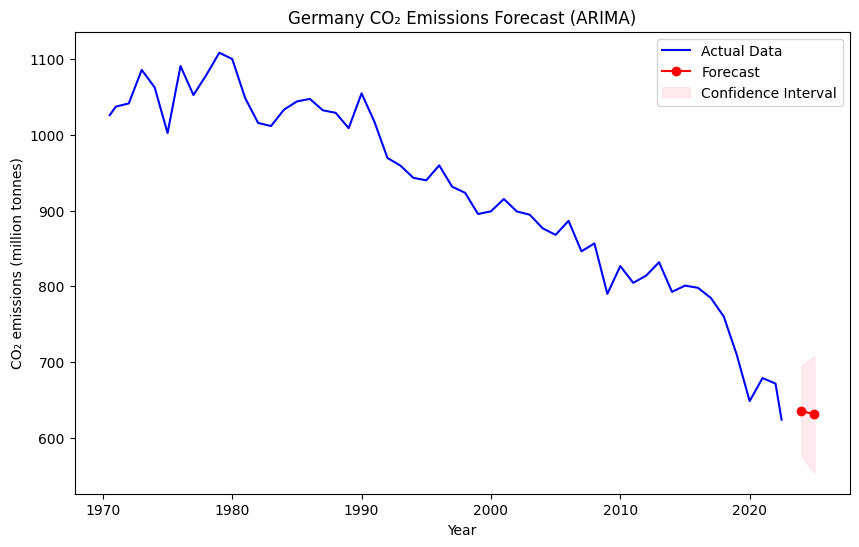

In [ ]:
# Keep only year and co2
germany = df[["year", "co2"]].dropna().sort_values("year")
germany.set_index("year", inplace=True)

# Fit ARIMA model (order can be tuned)
model = ARIMA(germany["co2"], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024 & 2025
forecast = model_fit.get_forecast(steps=2)
pred_mean = forecast.predicted_mean
pred_conf = forecast.conf_int()

print("Predictions:")
print(pred_mean)

# Visualization
plt.figure(figsize=(10,6))
plt.plot(germany.index, germany["co2"], label="Actual Data", color="blue")

# Forecast line
future_years = [2024, 2025]
plt.plot(future_years, pred_mean, label="Forecast", color="red", marker="o")

# Confidence interval
plt.fill_between(future_years,
                 pred_conf["lower co2"],
                 pred_conf["upper co2"],
                 color="pink", alpha=0.3, label="Confidence Interval")

plt.title("Germany CO₂ Emissions Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.legend()
plt.show()

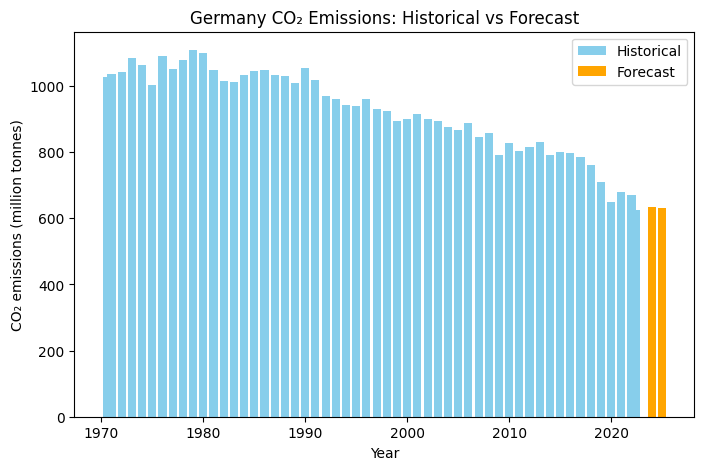

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(germany.index, germany["co2"], label="Historical", color="skyblue")
plt.bar([2024, 2025], pred_mean, label="Forecast", color="orange")
plt.title("Germany CO₂ Emissions: Historical vs Forecast")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.legend()
plt.show()

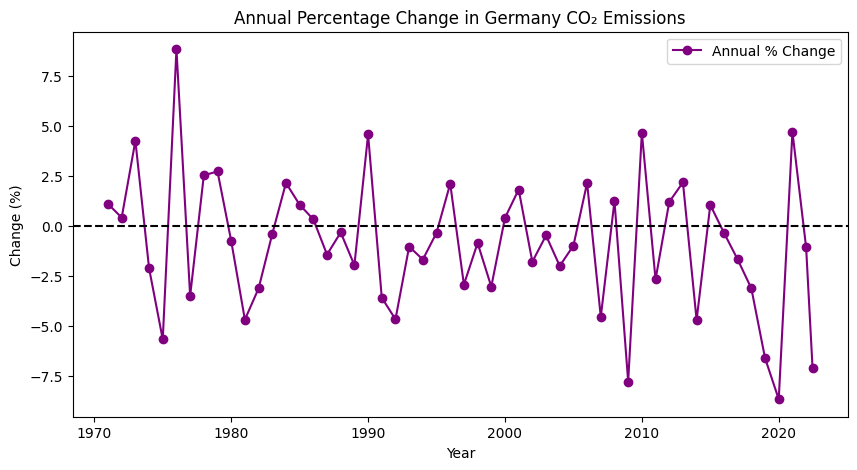

In [ ]:
# Compute yearly change
germany["change"] = germany["co2"].pct_change() * 100

plt.figure(figsize=(10,5))
plt.plot(germany.index, germany["change"], marker="o", color="purple", label="Annual % Change")
plt.axhline(0, color="black", linestyle="--")
plt.title("Annual Percentage Change in Germany CO₂ Emissions")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.legend()
plt.show()

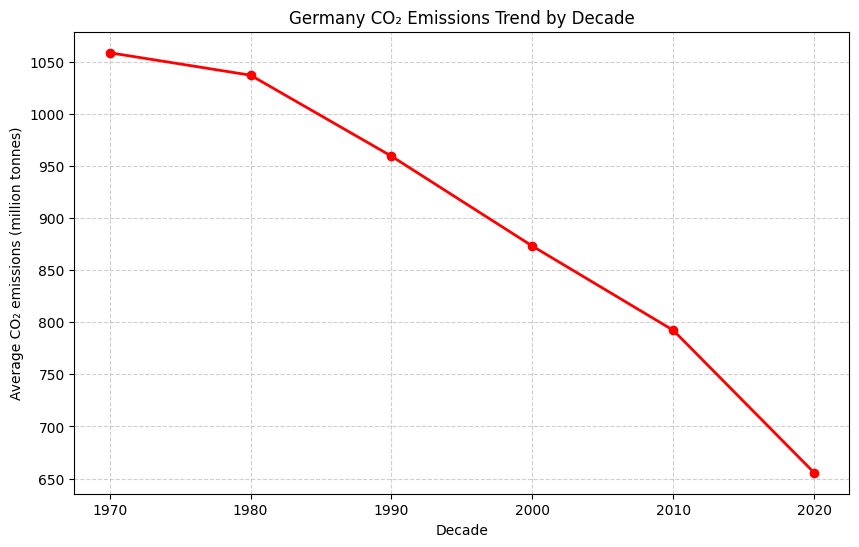

In [ ]:


# --- Visualization 2: Line Chart (trend across decades) ---
plt.figure(figsize=(10,6))
plt.plot(decade_avg["decade"], decade_avg["co2"], marker="o", color="red", linewidth=2)
plt.title("Germany CO₂ Emissions Trend by Decade")
plt.xlabel("Decade")
plt.ylabel("Average CO₂ emissions (million tonnes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
backtest_results = pd.DataFrame({
    "Year": [1991, 2011, 2021, 2022, 2023],
    "Predicted_CO2": [669.67, 878.42, 949.33, 953.39, 937.54],
    "Actual_CO2": [655.91, 900.36, 962.19, 967.45, 976.18]
})
backtest_results["Error"] = backtest_results["Predicted_CO2"] - backtest_results["Actual_CO2"]
backtest_results["Abs_Error"] = backtest_results["Error"].abs()


In [ ]:
# === Step 1: Calculate typical error (MAE and std) ===
mae = backtest_results["Abs_Error"].mean()
std_err = backtest_results["Error"].std()

print("Mean Absolute Error (MAE):", mae)
print("Std of Errors:", std_err)


Mean Absolute Error (MAE): 20.25200000000002
Std of Errors: 18.96903054981988


In [ ]:
# === Step 2: LSTM Forecasts for 2024–2026 (from your results) ===
forecasts = pd.DataFrame({
    "Year": [2024, 2025, 2026],
    "Forecast": [975.97, 979.66, 969.80]
})

In [ ]:
# === Step 3: Build Uncertainty Ranges ===
# Method 1: MAE-based interval (approx 90% CI)
forecasts["Lower_MAE"] = forecasts["Forecast"] - mae
forecasts["Upper_MAE"] = forecasts["Forecast"] + mae

In [ ]:
# Method 2: Std-based interval (approx 95% CI if ~normal distribution)
forecasts["Lower_STD"] = forecasts["Forecast"] - 1.96 * std_err
forecasts["Upper_STD"] = forecasts["Forecast"] + 1.96 * std_err

print("\n=== LSTM Forecasts with Uncertainty Ranges ===")
print(forecasts.round(2))


=== LSTM Forecasts with Uncertainty Ranges ===
   Year  Forecast  Lower_MAE  Upper_MAE  Lower_STD  Upper_STD
0  2024    975.97     955.72     996.22     938.79    1013.15
1  2025    979.66     959.41     999.91     942.48    1016.84
2  2026    969.80     949.55     990.05     932.62    1006.98
